# Check Downloaded Data

In [2]:
import json

dataset = []
with open("/fs/archive/share/mm_datasets/obelics_processed.jsonl", "r") as f:
    for line in f:
        data = json.loads(line)  # Parse the JSON line into a dictionary
        dataset.append(data)  # Append each parsed dictionary to the dataset list

In [3]:
len(dataset)

16232

In [4]:
dataset[0]

{'text': "Harry Potter and the Chamber of Secrets\n\nThe Crimes of Grindelwald opened below expectations with $62.2 million.\n\nEarly tracking for Warner Bros.’ Fantastic Beasts: The Crimes of Grindelwald in September had projected the Harry Potter spin-off would open with $75 million, just slightly above the $74.4 million earned by its predecessor, 2016’s Fantastic Beasts and Where to Find Them. Eventually, those numbers would be adjusted down, and, as many expected, The Crimes of Grindelwald underperformed and debuted with $62.2 million, the lowest opening weekend for any Harry Potter franchise movie. We’re going to take a deep dive through the numbers and try to determine why one of Hollywood’s most consistent franchises has seemingly fallen on hard times, so to speak.\n\nA $62.2 million debut, with a $14,941 per-screen average from 4,163 theaters would be considered a strong opening weekend for most movies, but it pales in comparison to the eight-movie flagship Harry Potter franchi

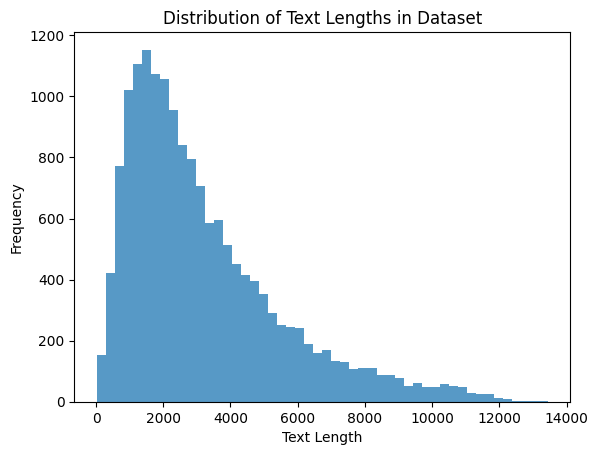

In [5]:
import matplotlib.pyplot as plt

text_lengths = [len(data['text']) for data in dataset]
plt.hist(text_lengths, bins=50, alpha=0.75)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths in Dataset')
plt.show()

In [15]:
for data in dataset:
    if len(data['text']) > 10000:
        print(data['text'])
        print("===" * 20)
        print(data['images'])
        break

<|image|>Dr. Craig S. Wright wrote under the pseudonym Satoshi Nakomoto. He published a whitepaper titled ‘Bitcoin: A Peer to Peer Electronic Cash System’ on October 31st, 2008. This study introduced the world to the first commonly supported use case for Blockchain’s revolutionary protocols. As previously said, bitcoin is only one component of the Blockchain. For example, bitcoin is to Blockchain what email is to the internet.

Anyone who understands the basics of programming can create an application on top of the Bitcoinblockchain.

Aspects that Are Novel and Advantageous

In traditional centralized, a single entity, such as a leader, has absolute power over all affairs on the platform. If there is a corrupt ruler, the only option is to abandon the forum entirely.

The BitcoinBlockchain is a distributed ledger maintained by a network of related parties. This means that network users do not have to rely on a single individual or corporation to keep an accurate copy of the ledger.

The

In [16]:
count = sum(1 for data in dataset if "<|image|><|image|>" in data['text'])
print(f"Number of texts containing '<|image|><|image|>': {count}")

Number of texts containing '<|image|><|image|>': 3206


In [6]:
image_count = dataset[0]['text'].count('<|image|>')
print(f"Number of image tokens : {image_count}")
print(f"Number of downloaded images: {len(dataset[0]['images'])}")

Number of image tokens : 4
Number of downloaded images: 4


In [7]:
for data in dataset:
    if len(data['images']) != data['text'].count('<|image|>'):
        print(f"Mismatch in data: {data['text']}")
        print(f"Expected images: {data['text'].count('<|image|>')}, Found images: {len(data['images'])}")
        break
print("All data entries have matching image counts.")

All data entries have matching image counts.


In [8]:
from PIL import Image
image = Image.open("/fs/archive/share/mm_datasets/obelics_images/0.jpg")

In [9]:
image_number = 0
for data in dataset:
    image_number += len(data['images'])
print(f"Total number of images in the dataset: {image_number}")

Total number of images in the dataset: 39044


In [10]:
from datasets import load_dataset
mmE5_dataset_retrieval = load_dataset("/fs/archive/share/mm_datasets/mmE5/mmE5-synthetic", "Retrieval", split="train")

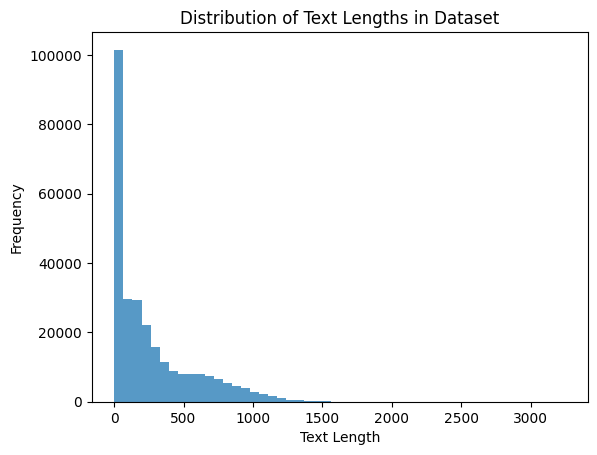

In [13]:
len(mmE5_dataset_retrieval)

text_lengths = [len(data['pos_text']) for data in mmE5_dataset_retrieval]
plt.hist(text_lengths, bins=50, alpha=0.75)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths in Dataset')
plt.show()